Asif Arman Rahman

In [1]:
# pip install pandas nltk bnlp_toolkit seaborn matplotlib numpy

In [ ]:
import nltk
import pandas as pd
from bnlp import NLTKTokenizer
from string import punctuation as en_punc
from bnlp.corpus import punctuations as bn_punc
from nltk.corpus import stopwords as en_stopwords
from bnlp.corpus import stopwords as bn_stopwords
from nltk.tokenize import word_tokenize as en_word_tokenize
from bnlp.corpus.util import remove_stopwords as bn_remove_stopwords


pd.set_option('display.max_colwidth', 100)

## **Load Dataset**

In [3]:
%%time

# Load English Dataset

dataset_en = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neovotech/data/corpus.train.en', sep="\t", header=None, names=['text_data'])

# Load English Dataset
dataset_bn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neovotech/data/corpus.train.bn', sep="\t", header=None, names=['text_data'])

CPU times: user 13.7 s, sys: 1.7 s, total: 15.4 s
Wall time: 16.3 s


In [4]:
display(dataset_en.head(10))
display(dataset_bn.head(10))

,text_data
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-c...
1,trump
2,overrides
3,They warm the heart and ease the daily load.\nI love you.\nPort Company Limited - KPCL\ncommotio...
4,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:
5,Club.
6,So let us investigate. On Trial!
7,"In 2012, Alrawahi was featured on Global Voices Advocacy after he was detained for criticizing S..."
8,I wouldn't tell anybody even if he hadn't said that.
9,to give the bear a great big hug.


,text_data
0,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়।
1,তুরুপ
2,পদদলিত করা
3,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে।\nআমি ভালোবাসি তোমাকে ।\nপোর্ট কোম্পানি ল...
4,আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্...
5,ক্লাব.
6,তাই আসুন এখন আমরা একবার পরীক্ষা করে দেখি যে তাদের এই দাবি সত্যি কি না।
7,ওমানের শাসক সুলতান কাবুস বিন সাইদের সমালোচনা করার অপরাধে আলরাওয়াহিকে শাস্তি প্রদানের পর গ্লোবাল ...
8,আমাকে না বললেও আমি কাউকে বলতাম না।
9,ভালুককে একটা আলিঙ্গন করে জড়িয়ে ধরে।


## **Clean Dataset / Preprocessing**

In [5]:
# As it can be seen "\n" exists in some lines, so well separate them and rebuild the DataFrame

def rebuild_dataframe(df):
    data_list = []

    for text in df['text_data']:

        # Some text where instance of float for some reason, but are supposed to be string so casting
        text = str(text)

        if '\n' in text:
            split_text = text.split('\n')

            for x in split_text:
                data_list.append(x)
        else:
            data_list.append(text)

    return pd.DataFrame(data_list, columns=['sentences'])

In [6]:
%%time

df_en = rebuild_dataframe(dataset_en)
df_bn = rebuild_dataframe(dataset_bn)

CPU times: user 2.78 s, sys: 62.1 ms, total: 2.84 s
Wall time: 2.83 s


In [7]:
print('Before rebuilding English dataFrame {0}, after {1}'.format(len(dataset_en),len(df_en)))
print('Before rebuilding Bengali dataFrame {0}, after {1}'.format(len(dataset_bn),len(df_bn)))

Before rebuilding English dataFrame 2535691, after 2659723
Before rebuilding Bengali dataFrame 2575982, after 2659723


In [8]:
display(df_en.head(10))
display(df_bn.head(10))

,sentences
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-c...
1,trump
2,overrides
3,They warm the heart and ease the daily load.
4,I love you.
5,Port Company Limited - KPCL
6,commotions
7,Clemenceau also expressed skepticism and frustration with Wilson's Fourteen Points: Mr. Wilson b...
8,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:
9,Club.


,sentences
0,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়।
1,তুরুপ
2,পদদলিত করা
3,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে।
4,আমি ভালোবাসি তোমাকে ।
5,পোর্ট কোম্পানি লিমিটেড - কেপিসিএল
6,তোলপাড়
7,"এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন। তিনি অভিযোগ করে বলেন, মিস্টার উইল..."
8,আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্...
9,ক্লাব.


In [9]:
# Remove Punctuation

def remove_punctuation(text, language='english'):
  if language is 'english':
    return "".join([word for word in text if word not in en_punc])
  elif language is 'bengali':
    return "".join([word for word in text if word not in bn_punc])
  else:
    raise ValueError("Language not supported.")

In [10]:
%%time

df_en['np_sents'] = df_en['sentences'].apply(lambda x: remove_punctuation(x))
df_bn['np_sents'] = df_bn['sentences'].apply(lambda x: remove_punctuation(x, language='bengali'))

display(df_en.head(10))
display(df_bn.head(10))

,sentences,np_sents
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-c...,better o Guaranteeing that every individual will be free to do as he wishes inevitably shortcha...
1,trump,trump
2,overrides,overrides
3,They warm the heart and ease the daily load.,They warm the heart and ease the daily load
4,I love you.,I love you
5,Port Company Limited - KPCL,Port Company Limited KPCL
6,commotions,commotions
7,Clemenceau also expressed skepticism and frustration with Wilson's Fourteen Points: Mr. Wilson b...,Clemenceau also expressed skepticism and frustration with Wilsons Fourteen Points Mr Wilson bore...
8,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,Other Twitter users went on commenting on Jallouds interview for AlJazeera and his attitude
9,Club.,Club


,sentences,np_sents
0,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়।,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়
1,তুরুপ,তুরুপ
2,পদদলিত করা,পদদলিত করা
3,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে।,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে
4,আমি ভালোবাসি তোমাকে ।,আমি ভালোবাসি তোমাকে
5,পোর্ট কোম্পানি লিমিটেড - কেপিসিএল,পোর্ট কোম্পানি লিমিটেড কেপিসিএল
6,তোলপাড়,তোলপাড়
7,"এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন। তিনি অভিযোগ করে বলেন, মিস্টার উইল...",এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন তিনি অভিযোগ করে বলেন মিস্টার উইলসন...
8,আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্...,আলজাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্ত...
9,ক্লাব.,ক্লাব


CPU times: user 49.5 s, sys: 1.05 s, total: 50.5 s
Wall time: 50.4 s


In [11]:
# tokenize words

def tokenize(text, language='english'):
  
  if language is 'english':  
    return en_word_tokenize(text)
  
  elif language is 'bengali':
    bn_word_tokenize = NLTKTokenizer()
    return bn_word_tokenize.word_tokenize(text)
  
  else:
    raise ValueError("Language not supported.")

In [12]:
%%time

df_en['word_tokens'] = df_en['np_sents'].apply(lambda x: tokenize(x))
df_bn['word_tokens'] = df_bn['np_sents'].apply(lambda x: tokenize(x, language='bengali'))

display(df_en.head(10))
display(df_bn.head(10))

,sentences,np_sents,word_tokens
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-c...,better o Guaranteeing that every individual will be free to do as he wishes inevitably shortcha...,"[better, o, Guaranteeing, that, every, individual, will, be, free, to, do, as, he, wishes, inevi..."
1,trump,trump,[trump]
2,overrides,overrides,[overrides]
3,They warm the heart and ease the daily load.,They warm the heart and ease the daily load,"[They, warm, the, heart, and, ease, the, daily, load]"
4,I love you.,I love you,"[I, love, you]"
5,Port Company Limited - KPCL,Port Company Limited KPCL,"[Port, Company, Limited, KPCL]"
6,commotions,commotions,[commotions]
7,Clemenceau also expressed skepticism and frustration with Wilson's Fourteen Points: Mr. Wilson b...,Clemenceau also expressed skepticism and frustration with Wilsons Fourteen Points Mr Wilson bore...,"[Clemenceau, also, expressed, skepticism, and, frustration, with, Wilsons, Fourteen, Points, Mr,..."
8,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,Other Twitter users went on commenting on Jallouds interview for AlJazeera and his attitude,"[Other, Twitter, users, went, on, commenting, on, Jallouds, interview, for, AlJazeera, and, his,..."
9,Club.,Club,[Club]


,sentences,np_sents,word_tokens
0,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়।,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়,"[আবার, সবাইকে, যার, যার, ইচ্ছামতো, চলতে, দিলে, সমতা, রক্ষা, করা, অসম্ভব, হয়ে, যায়]"
1,তুরুপ,তুরুপ,[তুরুপ]
2,পদদলিত করা,পদদলিত করা,"[পদদলিত, করা]"
3,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে।,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে,"[সেগুলো, হৃদয়কে, উষ্ণ, করে, এবং, রোজকার, বোঝাগুলোকে, হালকা, করে]"
4,আমি ভালোবাসি তোমাকে ।,আমি ভালোবাসি তোমাকে,"[আমি, ভালোবাসি, তোমাকে]"
5,পোর্ট কোম্পানি লিমিটেড - কেপিসিএল,পোর্ট কোম্পানি লিমিটেড কেপিসিএল,"[পোর্ট, কোম্পানি, লিমিটেড, কেপিসিএল]"
6,তোলপাড়,তোলপাড়,[তোলপাড়]
7,"এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন। তিনি অভিযোগ করে বলেন, মিস্টার উইল...",এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন তিনি অভিযোগ করে বলেন মিস্টার উইলসন...,"[এছাড়াও, ক্লেমঁসো, উইলসনের, ১৪, দফার, ব্যাপারে, সংশয়ী, এবং, হতাশ, ছিলেন, তিনি, অভিযোগ, করে, বলেন..."
8,আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্...,আলজাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্ত...,"[আলজাজিরার, সঙ্গে, জালুদের, সাক্ষাতকার, এবং, তার, দৃষ্টিভঙ্গীর, বিষয়ে, অন্যান্য, টুইটার, ব্যবহার..."
9,ক্লাব.,ক্লাব,[ক্লাব]


CPU times: user 10min 54s, sys: 12.6 s, total: 11min 7s
Wall time: 11min 8s


In [ ]:
# in case not downloaded uncomment the next comment
# nltk.download('stopwords')


# Remove stop words

def remove_stopwords(text, language='english'):
  if language is 'english':
    # load eng stopwords
    en_sw = en_stopwords.words('english')

    en_stopwords_np = []

    # Removing punctuations from stopwords
    for x in en_sw:  
      en_stopwords_np.append(remove_punctuation(x))

    return [word for word in text if word.lower() not in en_stopwords_np]

  elif language is 'bengali':
    bn_stopwords_np = []

    # Removing punctuations from stopwords
    for x in bn_stopwords:
      bn_stopwords_np.append(remove_punctuation(x))

    return [word for word in text if word not in bn_stopwords_np]

  else:
    raise ValueError("Language not supported.")

In [16]:
%%time

df_en['word_token_ns'] = df_en['word_tokens'].apply(lambda x: remove_stopwords(x))

CPU times: user 13min 39s, sys: 38.3 s, total: 14min 17s
Wall time: 14min 16s


In [17]:
%%time

df_bn['word_token_ns'] = df_bn['word_tokens'].apply(lambda x: remove_stopwords(x, language='bengali'))

display(df_en.head(10))
display(df_bn.head(10))

,sentences,np_sents,word_tokens,word_token_ns
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-c...,better o Guaranteeing that every individual will be free to do as he wishes inevitably shortcha...,"[better, o, Guaranteeing, that, every, individual, will, be, free, to, do, as, he, wishes, inevi...","[better, Guaranteeing, every, individual, free, wishes, inevitably, shortchanges, equality]"
1,trump,trump,[trump],[trump]
2,overrides,overrides,[overrides],[overrides]
3,They warm the heart and ease the daily load.,They warm the heart and ease the daily load,"[They, warm, the, heart, and, ease, the, daily, load]","[warm, heart, ease, daily, load]"
4,I love you.,I love you,"[I, love, you]",[love]
5,Port Company Limited - KPCL,Port Company Limited KPCL,"[Port, Company, Limited, KPCL]","[Port, Company, Limited, KPCL]"
6,commotions,commotions,[commotions],[commotions]
7,Clemenceau also expressed skepticism and frustration with Wilson's Fourteen Points: Mr. Wilson b...,Clemenceau also expressed skepticism and frustration with Wilsons Fourteen Points Mr Wilson bore...,"[Clemenceau, also, expressed, skepticism, and, frustration, with, Wilsons, Fourteen, Points, Mr,...","[Clemenceau, also, expressed, skepticism, frustration, Wilsons, Fourteen, Points, Mr, Wilson, bo..."
8,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,Other Twitter users went on commenting on Jallouds interview for AlJazeera and his attitude,"[Other, Twitter, users, went, on, commenting, on, Jallouds, interview, for, AlJazeera, and, his,...","[Twitter, users, went, commenting, Jallouds, interview, AlJazeera, attitude]"
9,Club.,Club,[Club],[Club]


,sentences,np_sents,word_tokens,word_token_ns
0,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়।,আবার সবাইকে যার যার ইচ্ছামতো চলতে দিলে সমতা রক্ষা করা অসম্ভব হয়ে যায়,"[আবার, সবাইকে, যার, যার, ইচ্ছামতো, চলতে, দিলে, সমতা, রক্ষা, করা, অসম্ভব, হয়ে, যায়]","[সবাইকে, ইচ্ছামতো, চলতে, দিলে, সমতা, রক্ষা, অসম্ভব, হয়ে, যায়]"
1,তুরুপ,তুরুপ,[তুরুপ],[তুরুপ]
2,পদদলিত করা,পদদলিত করা,"[পদদলিত, করা]",[পদদলিত]
3,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে।,সেগুলো হৃদয়কে উষ্ণ করে এবং রোজকার বোঝাগুলোকে হালকা করে,"[সেগুলো, হৃদয়কে, উষ্ণ, করে, এবং, রোজকার, বোঝাগুলোকে, হালকা, করে]","[সেগুলো, হৃদয়কে, উষ্ণ, রোজকার, বোঝাগুলোকে, হালকা]"
4,আমি ভালোবাসি তোমাকে ।,আমি ভালোবাসি তোমাকে,"[আমি, ভালোবাসি, তোমাকে]","[ভালোবাসি, তোমাকে]"
5,পোর্ট কোম্পানি লিমিটেড - কেপিসিএল,পোর্ট কোম্পানি লিমিটেড কেপিসিএল,"[পোর্ট, কোম্পানি, লিমিটেড, কেপিসিএল]","[পোর্ট, কোম্পানি, লিমিটেড, কেপিসিএল]"
6,তোলপাড়,তোলপাড়,[তোলপাড়],[তোলপাড়]
7,"এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন। তিনি অভিযোগ করে বলেন, মিস্টার উইল...",এছাড়াও ক্লেমঁসো উইলসনের ১৪ দফার ব্যাপারে সংশয়ী এবং হতাশ ছিলেন তিনি অভিযোগ করে বলেন মিস্টার উইলসন...,"[এছাড়াও, ক্লেমঁসো, উইলসনের, ১৪, দফার, ব্যাপারে, সংশয়ী, এবং, হতাশ, ছিলেন, তিনি, অভিযোগ, করে, বলেন...","[এছাড়াও, ক্লেমঁসো, উইলসনের, ১৪, দফার, সংশয়ী, হতাশ, অভিযোগ, মিস্টার, উইলসনের, ১৪, দফা, বিরক্তিকর]"
8,আল-জাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্...,আলজাজিরার সঙ্গে জালুদের সাক্ষাতকার এবং তার দৃষ্টিভঙ্গীর বিষয়ে অন্যান্য টুইটার ব্যবহারকারীরা মন্ত...,"[আলজাজিরার, সঙ্গে, জালুদের, সাক্ষাতকার, এবং, তার, দৃষ্টিভঙ্গীর, বিষয়ে, অন্যান্য, টুইটার, ব্যবহার...","[আলজাজিরার, জালুদের, সাক্ষাতকার, দৃষ্টিভঙ্গীর, বিষয়ে, অন্যান্য, টুইটার, ব্যবহারকারীরা, মন্তব্য]"
9,ক্লাব.,ক্লাব,[ক্লাব],[ক্লাব]


CPU times: user 19min 33s, sys: 4.51 s, total: 19min 38s
Wall time: 19min 39s


## **1.  Bigrams**

---

In [18]:
from nltk.util import ngrams

def n_grams(list_words_token, n):
  xgrams = []

  for tokens in list_words_token:
    try:
      xgrams.append(list(ngrams(tokens, n)))
    except:
      # some empty tokens existed which throw exception when passed through ngrams
      temp = []
      xgrams.append(temp)

  return xgrams



In [19]:
en_bigrams = n_grams(df_en['word_token_ns'], 2)

In [20]:
bn_bigrams = n_grams(df_bn['word_token_ns'], 2)

list_of_tuple = list(zip(en_bigrams, bn_bigrams))
bigramsFrame = pd.DataFrame(list_of_tuple, columns = ['en_bigrams', 'bn_bigrams'])

bigramsFrame.head(10)

,en_bigrams,bn_bigrams
0,"[(better, Guaranteeing), (Guaranteeing, every), (every, individual), (individual, free), (free, ...","[(সবাইকে, ইচ্ছামতো), (ইচ্ছামতো, চলতে), (চলতে, দিলে), (দিলে, সমতা), (সমতা, রক্ষা), (রক্ষা, অসম্ভব..."
1,[],[]
2,[],[]
3,"[(warm, heart), (heart, ease), (ease, daily), (daily, load)]","[(সেগুলো, হৃদয়কে), (হৃদয়কে, উষ্ণ), (উষ্ণ, রোজকার), (রোজকার, বোঝাগুলোকে), (বোঝাগুলোকে, হালকা)]"
4,[],"[(ভালোবাসি, তোমাকে)]"
5,"[(Port, Company), (Company, Limited), (Limited, KPCL)]","[(পোর্ট, কোম্পানি), (কোম্পানি, লিমিটেড), (লিমিটেড, কেপিসিএল)]"
6,[],[]
7,"[(Clemenceau, also), (also, expressed), (expressed, skepticism), (skepticism, frustration), (fru...","[(এছাড়াও, ক্লেমঁসো), (ক্লেমঁসো, উইলসনের), (উইলসনের, ১৪), (১৪, দফার), (দফার, সংশয়ী), (সংশয়ী, হতাশ..."
8,"[(Twitter, users), (users, went), (went, commenting), (commenting, Jallouds), (Jallouds, intervi...","[(আলজাজিরার, জালুদের), (জালুদের, সাক্ষাতকার), (সাক্ষাতকার, দৃষ্টিভঙ্গীর), (দৃষ্টিভঙ্গীর, বিষয়ে),..."
9,[],[]


## **2.  Trigrams**
---

In [21]:
en_trigrams = n_grams(df_en['word_token_ns'], 3)
bn_trigrams = n_grams(df_bn['word_token_ns'], 3)

list_of_tuple = list(zip(en_trigrams, bn_trigrams))
trigramsFrame = pd.DataFrame(list_of_tuple, columns = ['en_trigrams', 'bn_trigrams'])

trigramsFrame.head(10)

,en_trigrams,bn_trigrams
0,"[(better, Guaranteeing, every), (Guaranteeing, every, individual), (every, individual, free), (i...","[(সবাইকে, ইচ্ছামতো, চলতে), (ইচ্ছামতো, চলতে, দিলে), (চলতে, দিলে, সমতা), (দিলে, সমতা, রক্ষা), (সমত..."
1,[],[]
2,[],[]
3,"[(warm, heart, ease), (heart, ease, daily), (ease, daily, load)]","[(সেগুলো, হৃদয়কে, উষ্ণ), (হৃদয়কে, উষ্ণ, রোজকার), (উষ্ণ, রোজকার, বোঝাগুলোকে), (রোজকার, বোঝাগুলোকে..."
4,[],[]
5,"[(Port, Company, Limited), (Company, Limited, KPCL)]","[(পোর্ট, কোম্পানি, লিমিটেড), (কোম্পানি, লিমিটেড, কেপিসিএল)]"
6,[],[]
7,"[(Clemenceau, also, expressed), (also, expressed, skepticism), (expressed, skepticism, frustrati...","[(এছাড়াও, ক্লেমঁসো, উইলসনের), (ক্লেমঁসো, উইলসনের, ১৪), (উইলসনের, ১৪, দফার), (১৪, দফার, সংশয়ী), (..."
8,"[(Twitter, users, went), (users, went, commenting), (went, commenting, Jallouds), (commenting, J...","[(আলজাজিরার, জালুদের, সাক্ষাতকার), (জালুদের, সাক্ষাতকার, দৃষ্টিভঙ্গীর), (সাক্ষাতকার, দৃষ্টিভঙ্গী..."
9,[],[]


## **3.  Zipf's Law Word Frquency**

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

def zips_plot(data, language=None):

    if language is 'bengali':
        import matplotlib.font_manager as fm

        fe = fm.FontEntry(
        fname='/content/drive/MyDrive/fonts',
        name='kalpurush')

        fm.fontManager.ttflist.insert(0, fe) # or append is fine
        plt.rcParams['font.family'] = fe.name # = 'your custom ttf font name'

    sns.set(style="whitegrid", color_codes=True)
    sns.set(rc={'figure.figsize':(25, 10)})

    # limiting to top 20 words
    sns.barplot(x=data.frequency[:10], y=data.word[:10], palette=colors_from_values(data.frequency, "rocket_r"))
    plt.show()
    
    del data

In [48]:
def zipfs_word_df(tokens):
    word_freq = {}

    for words in tokens:
        for word in words:
            if word not in word_freq:
                word_freq[word] = 1
            else:
                word_freq[word] += 1

    word = []
    freq = []

    for key in word_freq:
        word.append(key)
        freq.append(word_freq[key])

    df_temp = pd.DataFrame(list(zip(word,freq)), columns=['word', 'frequency'])
    
    df_temp = df_temp.sort_values(by='frequency', ascending=False)

    return df_temp

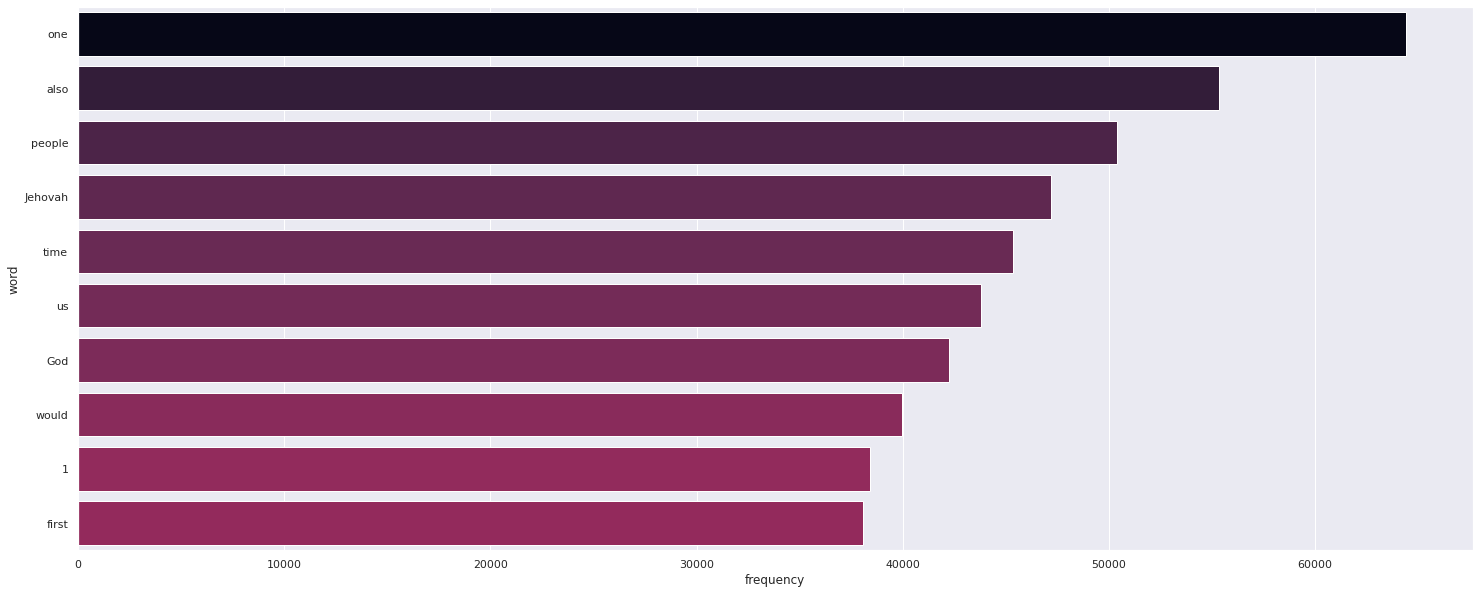

In [53]:
df_zipf1 = zipfs_word_df(df_en['word_token_ns'])
zips_plot(df_zipf1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2503 missing from current font.
  font.set_text(s

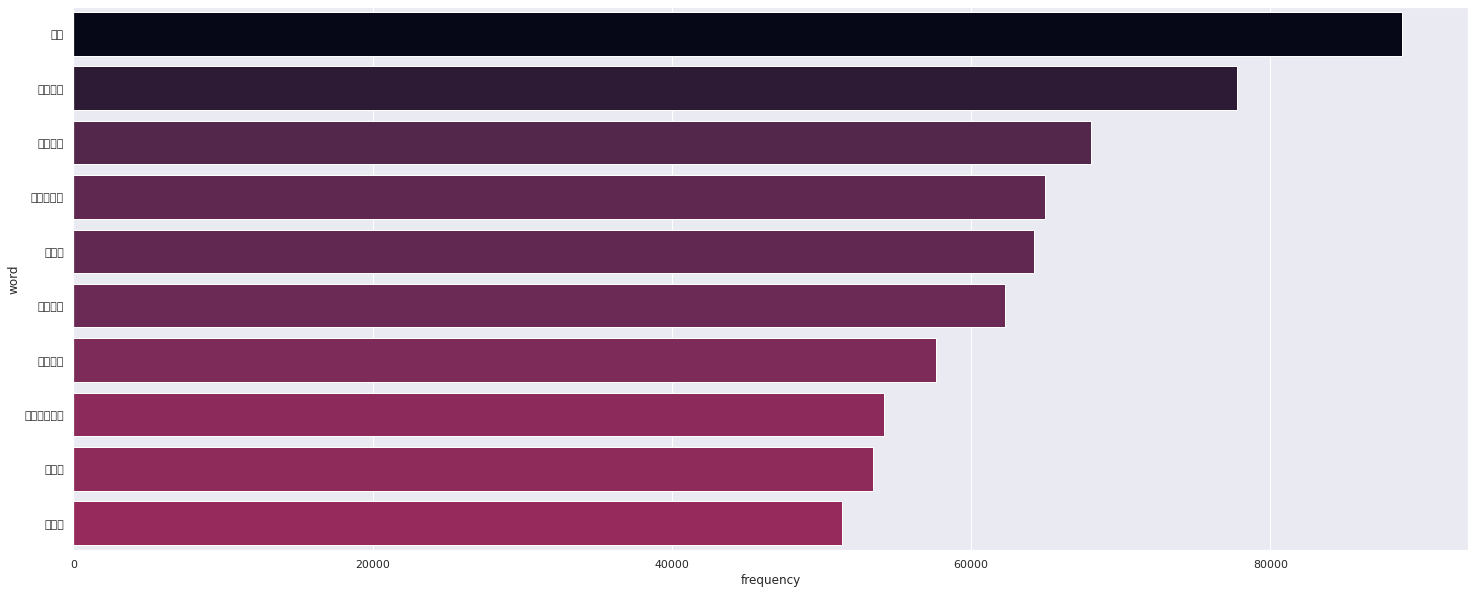

In [59]:
df_zipf2 = zipfs_word_df(df_bn['word_token_ns'])
zips_plot(df_zipf2, language='bengali')

In [60]:
# top 10 names shown in the graph upward
df_zipf2.head(10)

,word,frequency
1047,এক,88804
65,সালে,77744
94,একজন,67989
553,হয়েছে,64962
7,হয়ে,64231
407,সাথে,62274
71,একটা,57636
295,হিসেবে,54165
421,সময়,53428
8,যায়,51367


## **4.  Stemming and Lemmatization**

In [78]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer
from bengali_stemmer.rafikamal2014 import RafiStemmer

# in case not downloaded uncomment the next comment
# nltk.download('wordnet')

def stemming(text, language='english'):

    if language is 'english':
        ps = PorterStemmer()
        return [ps.stem(word) for word in text]
    elif language is 'bengali':
        bstem = RafiStemmer()
        return [bstem.stem_word(word) for word in text]
    else:
        raise ValueError("Language not supported.")

def lemmatization(text, language='english'):

    if language is 'english':
        wn = WordNetLemmatizer()
        return [wn.lemmatize(word) for word in text]
    elif language is 'bengali':
        blemma = BengaliLemmatizer()
        return [blemma.lemmatize(word, pos=lem.POS_PROPN) for word in text]
    else:
        raise ValueError("Language not supported.")

In [62]:
df_en['stemmed'] = df_en['word_token_ns'].apply(lambda x: stemming(x))

In [80]:
# TODO: Find lemmatizer for bengali
df_bn['stemmed'] = df_bn['word_token_ns'].apply(lambda x: stemming(x, language='bengali'))

In [66]:
df_en['lemmatized'] = df_en['word_token_ns'].apply(lambda x: lemmatization(x))

In [ ]:
df_bn['lemmatized'] = df_bn['word_token_ns'].apply(lambda x: lemmatization(x, language='bengali'))

In [69]:
display(df_en[['stemmed', 'lemmatized']].head(10))
display(df_bn[['stemmed', 'lemmatized']].head(10))

,stemmed,lemmatized
0,"[better, guarante, everi, individu, free, wish, inevit, shortchang, equal]","[better, Guaranteeing, every, individual, free, wish, inevitably, shortchanges, equality]"
1,[trump],[trump]
2,[overrid],[override]
3,"[warm, heart, eas, daili, load]","[warm, heart, ease, daily, load]"
4,[love],[love]
5,"[port, compani, limit, kpcl]","[Port, Company, Limited, KPCL]"
6,[commot],[commotion]
7,"[clemenceau, also, express, skeptic, frustrat, wilson, fourteen, point, Mr, wilson, bore, fourte...","[Clemenceau, also, expressed, skepticism, frustration, Wilsons, Fourteen, Points, Mr, Wilson, bo..."
8,"[twitter, user, went, comment, jalloud, interview, aljazeera, attitud]","[Twitter, user, went, commenting, Jallouds, interview, AlJazeera, attitude]"
9,[club],[Club]


,stemmed,lemmatized
0,"[সবাইকে, ইচ্ছামতো, চলতে, দিলে, সমতা, রক্ষা, অসম্ভব, হয়ে, যায়]","[সবাইকে, ইচ্ছামতো, চলতে, দিলে, সমতা, রক্ষা, অসম্ভব, হয়ে, যায়]"
1,[তুরুপ],[তুরুপ]
2,[পদদলিত],[পদদলিত]
3,"[সেগুলো, হৃদয়কে, উষ্ণ, রোজকার, বোঝাগুলোকে, হালকা]","[সেগুলো, হৃদয়কে, উষ্ণ, রোজকার, বোঝাগুলোকে, হালকা]"
4,"[ভালোবাসি, তোমাকে]","[ভালোবাসি, তোমাকে]"
5,"[পোর্ট, কোম্পানি, লিমিটেড, কেপিসিএল]","[পোর্ট, কোম্পানি, লিমিটেড, কেপিসিএল]"
6,[তোলপাড়],[তোলপাড়]
7,"[এছাড়াও, ক্লেমঁসো, উইলসনের, ১৪, দফার, সংশয়ী, হতাশ, অভিযোগ, মিস্টার, উইলসনের, ১৪, দফা, বিরক্তিকর]","[এছাড়াও, ক্লেমঁসো, উইলসনের, ১৪, দফার, সংশয়ী, হতাশ, অভিযোগ, মিস্টার, উইলসনের, ১৪, দফা, বিরক্তিকর]"
8,"[আলজাজিরার, জালুদের, সাক্ষাতকার, দৃষ্টিভঙ্গীর, বিষয়ে, অন্যান্য, টুইটার, ব্যবহারকারীরা, মন্তব্য]","[আলজাজিরার, জালুদের, সাক্ষাতকার, দৃষ্টিভঙ্গীর, বিষয়ে, অন্যান্য, টুইটার, ব্যবহারকারীরা, মন্তব্য]"
9,[ক্লাব],[ক্লাব]


## **5.  Sentence/instance repetition**

In [ ]:
df_en['word_token_ns']

def stringify(tokens):
    return [[' '.join(i)] for i in tokens]

def find_repetition(tokens):
    
    sent_freq = {}

    sents_list = stringify(tokens)

    for x in sents_list:
        if x[0] not in sent_freq:
            sent_freq[x] = 1
        else:
            sent_freq[x] += 1

    sents = []
    freq = []

    for key in sent_freq:
        sents.append(key)
        freq.append(sent_freq[key])

    df_temp = pd.DataFrame(list(zip(sents,freq)), columns=['sents', 'frequency'])
    
    df_temp = df_temp.sort_values(by='frequency', ascending=False)

    return df_temp




In [ ]:
df_repe1 = find_repetition(df_en['word_token_ns'])
df_repe2 = find_repetition(df_bn['word_token_ns'])

In [ ]:
display(df_repe1)
display(df_repe2)

## **6.  TD-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Tfided(tokens):

    tfid = TfidfVectorizer()

    sentences = []

    sent_temp = stringify(tokens)

    for x in sent_temp:
        sentences.append(x[0])
    
    TfidVec = tfid.fit_transform(sentences)

    return pd.Dataframe(TfidVec.toarray(), columns=TfidVec.get_featurename())

In [ ]:
df_tfid1 = Tfided(df_en['word_token_ns'])
df_tfid2 = Tfided(df_bn['word_token_ns'])